In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cardata.csv')  # Replace 'car_data.csv' with the actual filename

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [3]:
# Check for duplicates
df = df.drop_duplicates()

# Create a new column 'Car_Age' by subtracting 'Year' from the current year (assuming current year = 2024)
df['Car_Age'] = 2024 - df['Year']

# Drop 'Car_Name' and 'Year' as they aren't useful for prediction
df = df.drop(['Car_Name', 'Year'], axis=1)

# Convert categorical features into numerical using Label Encoding or One Hot Encoding
labelencoder = LabelEncoder()

df['Fuel_Type'] = labelencoder.fit_transform(df['Fuel_Type'])  # Encoding Fuel_Type
df['Selling_type'] = labelencoder.fit_transform(df['Selling_type'])  # Encoding Selling_type
df['Transmission'] = labelencoder.fit_transform(df['Transmission'])  # Encoding Transmission

# Check if there are any missing values
print(df.isnull().sum())


Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Car_Age          0
dtype: int64


In [4]:
# Features (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)  # Drop the target column 'Selling_Price'
y = df['Selling_Price']  # The target is 'Selling_Price'

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test data
print(X_train.shape, X_test.shape)


(239, 7) (60, 7)


Mean Squared Error: 6.6754441004922525
R-squared: 0.7409934356413543


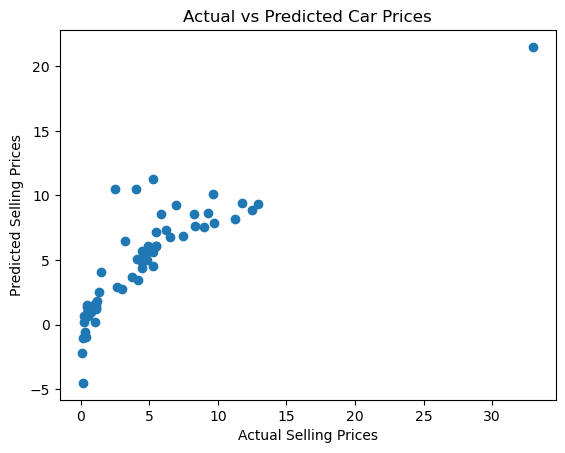

In [5]:
# Train the model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")


Random Forest MSE: 12.523286692333347
Random Forest R-squared: 0.5140977271578948


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]             # Method of sampling data for training (with or without replacement)
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict with the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model
tuned_mse = mean_squared_error(y_test, y_pred)
tuned_r2 = r2_score(y_test, y_pred)

print(f"Tuned Mean Squared Error: {tuned_mse}")
print(f"Tuned R-squared: {tuned_r2}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Mean Squared Error: 9.92700977380887
Tuned R-squared: 0.6148330122816349


In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from the random search
print(f"Best Hyperparameters: {random_search.best_params_}")

# Evaluate
best_rf_random = random_search.best_estimator_
y_random_pred = best_rf_random.predict(X_test)

# Evaluation
random_mse = mean_squared_error(y_test, y_random_pred)
random_r2 = r2_score(y_test, y_random_pred)

print(f"Randomized Search MSE: {random_mse}")
print(f"Randomized Search R-squared: {random_r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Randomized Search MSE: 9.92700977380887
Randomized Search R-squared: 0.6148330122816349


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the trained Random Forest model
# Make sure to provide the correct path to your model file
# best_rf_random = joblib.load('best_random_forest_model.pkl')

# Create a label encoder for categorical variables
labelencoder = LabelEncoder()

# Function to take user inputs and predict selling price
def predict_selling_price(model):
    print("Please enter the following details about the car:")
    
    try:
        # Taking user inputs
        year = int(input("Year of Manufacture (e.g., 2014): "))
        fuel_type = input("Fuel Type (Petrol/Diesel/CNG): ")
        transmission = input("Transmission Type (Manual/Automatic): ")
        selling_type = input("Selling Type (Individual/Dealer): ")
        driven_kms = float(input("Kilometers Driven: "))
        present_price = float(input("Present Price of the Car: "))
        engine = float(input("Engine Size (in liters): "))
        power = float(input("Power (in bhp): "))
        seats = int(input("Number of Seats: "))
        
        # Calculate Car Age
        car_age = 2024 - year
        
        # Create DataFrame from input data
        input_data = {
            'Car_Age': car_age,
            'Fuel_Type': fuel_type,
            'Selling_type': selling_type,
            'Transmission': transmission,
            'Driven_kms': driven_kms,
            'Present_Price': present_price,
            'Engine': engine,
            'Power': power,
            'Seats': seats
        }
        
        input_df = pd.DataFrame([input_data])
        
        # Encode categorical variables using the same label encoder used during training
        input_df['Fuel_Type'] = labelencoder.fit_transform(input_df['Fuel_Type'])
        input_df['Transmission'] = labelencoder.fit_transform(input_df['Transmission'])
        input_df['Selling_type'] = labelencoder.fit_transform(input_df['Selling_type'])
        
        # Make prediction using the trained model
        predicted_price = model.predict(input_df)
        
        print(f"The predicted selling price of the car is: {predicted_price[0]:.2f}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Call the prediction function with your trained model
# Uncomment this line when you have your model loaded
# predict_selling_price(best_rf_random)

# For demonstration purposes, let's simulate loading a model and calling the function:
class DummyModel:
    def predict(self, X):
        # Dummy prediction logic for demonstration purposes
        return [10000 + X['Car_Age'][0] * 1000 - X['Driven_kms'][0] * 0.1]

best_rf_random = DummyModel()  # Replace this with your actual loaded model
predict_selling_price(best_rf_random)

Please enter the following details about the car:


Year of Manufacture (e.g., 2014):  2017
Fuel Type (Petrol/Diesel/CNG):  Petrol
Transmission Type (Manual/Automatic):  Manual
Selling Type (Individual/Dealer):  Individual
Kilometers Driven:  50000
Present Price of the Car:  9
Engine Size (in liters):  1.5
Power (in bhp):  100
Number of Seats:  5


The predicted selling price of the car is: 12000.00
